<a href="https://colab.research.google.com/github/machave11/Python---Data-Science/blob/main/Plotting_and_Visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Making informative visualizations (sometimes called plots) is one of the most impor‐ tant tasks in data analysis. It may be a part of the exploratory process—for example, to help identify outliers or needed data transformations, or as a way of generating ideas for models. For others, building an interactive visualization for the web may be the end goal. Python has many add-on libraries for making static or dynamic visuali‐ zations, but I’ll be mainly focused on matplotlib and libraries that build on top of it.

Over time, matplotlib has spawned a number of add-on toolkits for data visualization that use matplotlib for their underlying plotting. One of these is seaborn

In [1]:
import numpy as np  
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
data = np.arange(10)
data

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

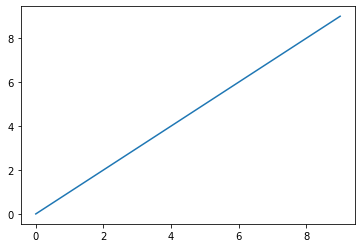

In [3]:
plt.plot(data)

#Figures and Subplots
Plots in matplotlib reside within a Figure object. You can create a new figure with plt.figure:

In [4]:
fig = plt.figure()

<Figure size 432x288 with 0 Axes>

In IPython, an empty plot window will appear, but in Jupyter nothing will be shown until we use a few more commands. plt.figure has a number of options; notably, figsize will guarantee the figure has a certain size and aspect ratio if saved to disk. You can’t make a plot with a blank figure. You have to create one or more subplots using add_subplot:

In [5]:
ax1 = fig.add_subplot(2,2,1)
ax1

In [6]:
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)

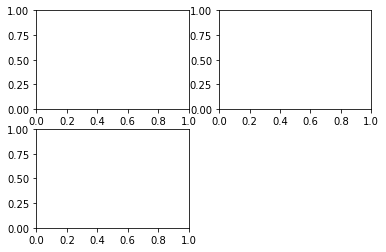

In [7]:
## Here we run all of these commands in the same cell:
fig = plt.figure()
ax1 = fig.add_subplot(2,2,1)
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)

#NOTE: One nuance of using Jupyter notebooks is that plots are reset after each cell is evaluated, so for more complex plots you must put all of the plotting commands in a single notebook cell.
When you issue a plotting command like plt.plot([1.5, 3.5, -2, 1.6]), mat‐ plotlib draws on the last figure and subplot used (creating one if necessary), thus hid‐ ing the figure and subplot creation. So if we add the following command, you’ll get something like

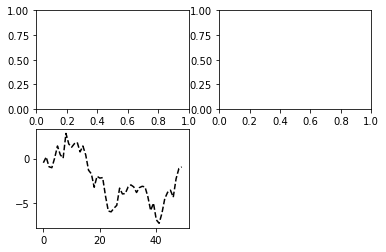

In [8]:
fig = plt.figure()
ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)
plt.plot(np.random.randn(50).cumsum(), 'k--')

The 'k--' is a style option instructing matplotlib to plot a black dashed line. The objects returned by fig.add_subplot here are AxesSubplot objects, on which you can directly plot on the other empty subplots by calling each one’s instance method

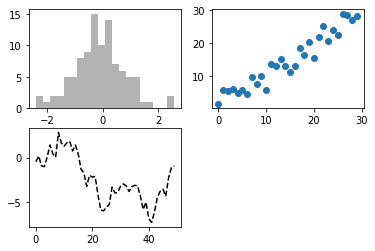

In [9]:
ax1.hist(np.random.randn(100), bins=20, color='k', alpha=0.3)
ax2.scatter(np.arange(30), np.arange(30) + 3 * np.random.randn(30))

fig

Creating a figure with a grid of subplots is a very common task, so matplotlib includes a convenience method, plt.subplots, that creates a new figure and returns a NumPy array containing the created subplot objects:

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ff9cccaa050>,
      dtype=object)

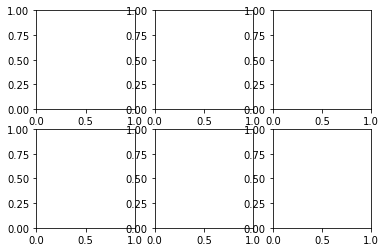

In [10]:
fig,axes = plt.subplots(2,3)
axes

This is very useful, as the axes array can be easily indexed like a two-dimensional array; for example, axes[0, 1].

#Adjusting the spacing around subplots

By default matplotlib leaves a certain amount of padding around the outside of the subplots and spacing between subplots. This spacing is all specified relative to the height and width of the plot, so that if you resize the plot either programmatically or manually using the GUI window, the plot will dynamically adjust itself. You can change the spacing using the subplots_adjust method on Figure objects, also avail‐ able as a top-level function:

wspace and hspace controls the percent of the figure width and figure height, respec‐ tively, to use as spacing between subplots. Here is a small example where I shrink the spacing all the way to zero

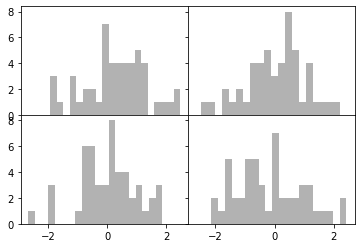

In [11]:
fig, axes = plt.subplots(2, 2, sharex=True, sharey=True)
for i in range(2):
  for j in range (2):
    axes[i,j].hist(np.random.randn(50), bins=20, color='k', alpha=0.3)
plt.subplots_adjust(wspace=0, hspace=0)

You can also indicate that subplots should have the same x- or y-axis using sharex and sharey, respectively. This is especially useful when you’re comparing data on the same scale; otherwise, matplotlib autoscales plot limits independently.

You may notice that the axis labels overlap. matplotlib doesn’t check whether the labels overlap, so in a case like this you would need to fix the labels yourself by speci‐ fying explicit tick locations and tick labels

# Colors, Markers, and Line Styles

Matplotlib’s main plot function accepts arrays of x and y coordinates and optionally a string abbreviation indicating color and line style. For example, to plot x versus y with green dashes, you would execute:

ax.plot(x, y, 'g--')

This way of specifying both color and line style in a string is provided as a conve‐ nience; in practice if you were creating plots programmatically you might prefer not to have to munge strings together to create plots with the desired style. The same plot could also have been expressed more explicitly as:

ax.plot(x, y, linestyle='--', color='g')

Line plots can additionally have markers to highlight the actual data points. Since matplotlib creates a continuous line plot, interpolating between points, it can occa‐ sionally be unclear where the points lie. The marker can be part of the style string, which must have color followed by marker type and line style

In [12]:
from numpy.random import randn

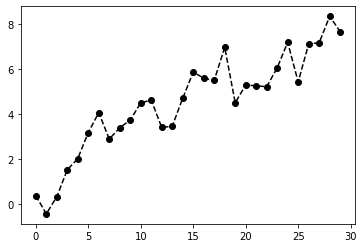

In [13]:
plt.plot(randn(30).cumsum(),'ko--')

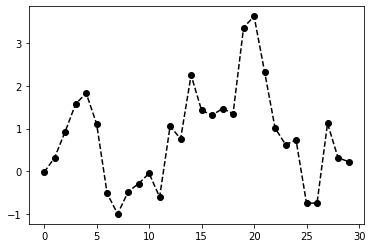

In [14]:
plt.plot(randn(30).cumsum(), 'k', linestyle='dashed',marker='o')

#Ticks, Labels, and Legends

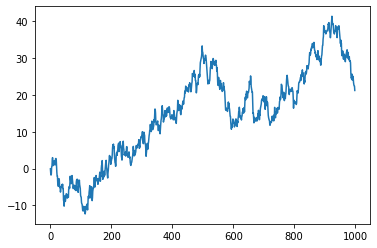

In [15]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.plot(np.random.randn(1000).cumsum())

To change the x-axis ticks, it’s easiest to use set_xticks and set_xticklabels. The former instructs matplotlib where to place the ticks along the data range; by default these locations will also be the labels. But we can set any other values as the labels using set_xticklabels:

In [16]:
ticks = ax.set_xticks([0, 250, 500, 750, 1000])
labels = ax.set_xticklabels(['one', 'two', 'three', 'four', 'five'],
                             rotation=30, fontsize='small')

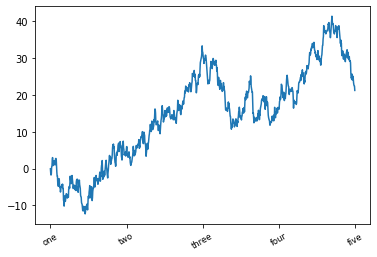

In [17]:
ax.set_title = 'my first matplotlib plot'
ax.set_xlabels = 'Stages'
fig

Modifying the y-axis consists of the same process, substituting y for x in the above. The axes class has a set method that allows batch setting of plot properties. From the prior example, we could also have written:

#Adding legends
Legends are another critical element for identifying plot elements. There are a couple of ways to add one. The easiest is to pass the label argument when adding each piece of the plot:

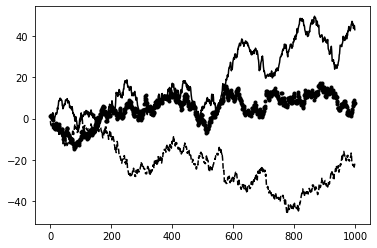

In [18]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.plot(randn(1000).cumsum(), 'k', label='one')
ax.plot(randn(1000).cumsum(), 'k--', label='two')
ax.plot(randn(1000).cumsum(), 'k.', label='three')

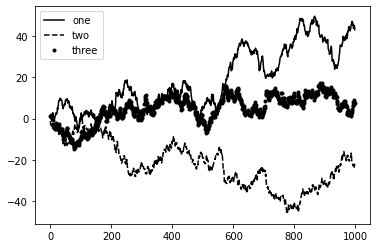

In [19]:
ax.legend(loc='best')
fig

The loc tells matplotlib where to place the plot. If you aren’t picky, 'best' is a good option, as it will choose a location that is most out of the way. To exclude one or more elements from the legend, pass no label or label='nolegend

#Annotations and Drawing on a Subplot

In addition to the standard plot types, you may wish to draw your own plot annota‐ tions, which could consist of text, arrows, or other shapes. You can add annotations and text using the text, arrow, and annotate functions. text draws text at given coordinates (x, y) on the plot with optional custom styling:

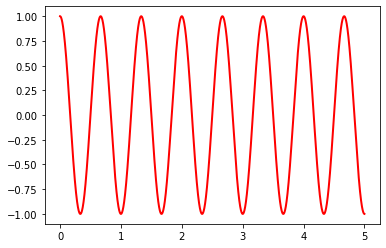

In [20]:
fig, a = plt.subplots() 
  
t = np.arange(0.0, 5.0, 0.001) 
s = np.cos(3 * np.pi * t) 
line = a.plot(t, s, lw = 2, color = 'red') 

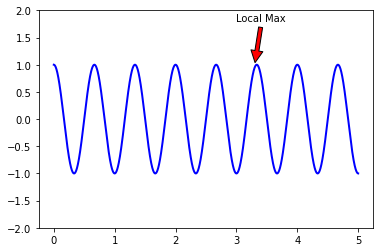

In [21]:
fig, a = plt.subplots() 
  
t = np.arange(0.0, 5.0, 0.001) 
s = np.cos(3 * np.pi * t) 
line = a.plot(t, s, lw = 2, color = 'blue') 
  
# Annotation 
a.annotate('Local Max', xy =(3.3, 1), 
                xytext =(3, 1.8),  
                arrowprops = dict(facecolor ='red', 
                                  shrink = 0.05),) 
  
a.set_ylim(-2, 2) 
  
# Plot the Annotation in the graph 
plt.show()

#matplotlib Configuration
matplotlib comes configured with color schemes and defaults that are geared primar‐ ily toward preparing figures for publication. Fortunately, nearly all of the default behavior can be customized via an extensive set of global parameters governing figure size, subplot spacing, colors, font sizes, grid styles, and so on. One way to modify the configuration programmatically from Python is to use the rc method; for example, to set the global default figure size to be 10 × 10, you could enter:

In [22]:
plt.rc('figure', figsize=(10,10))

The first argument to rc is the component you wish to customize, such as 'figure', 'axes', 'xtick', 'ytick', 'grid', 'legend', or many others. After that can follow a sequence of keyword arguments indicating the new parameters. An easy way to write down the options in your program is as a dict:

In [23]:
font_options = {'family' : 'monospace',
                'weight' : 'bold'}
plt.rc('font', **font_options)

Line Plots

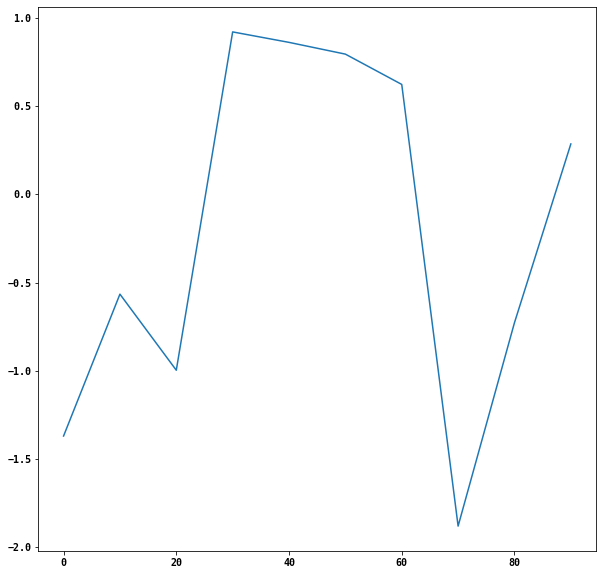

In [27]:
s = pd.Series(np.random.randn(10).cumsum(), index= np.arange(0,100,10))
s.plot()

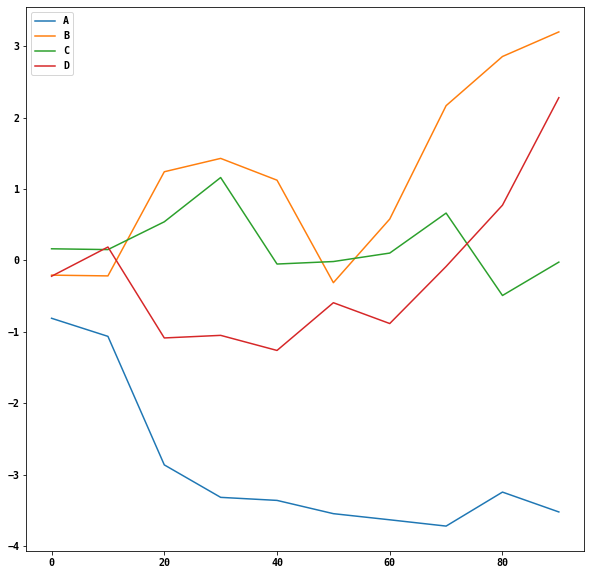

In [30]:
df = pd.DataFrame(np.random.randn(10, 4).cumsum(0),
 columns=['A', 'B', 'C', 'D'],
 index=np.arange(0, 100, 10))

df.plot()

#Bar Plots

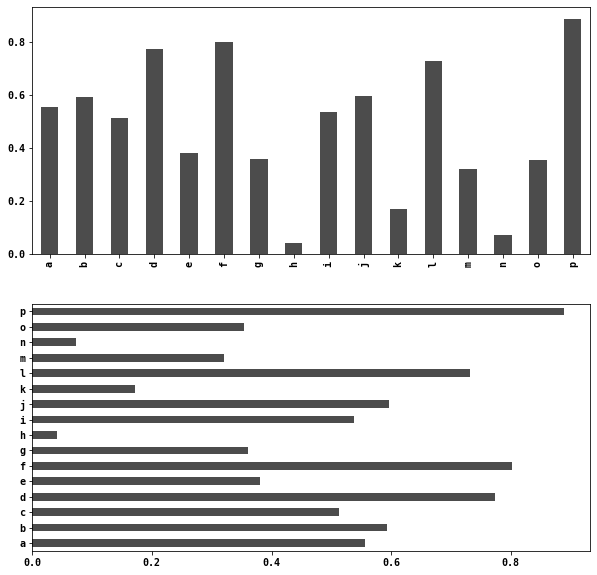

In [41]:
fig, axes = plt.subplots(2, 1)
data = pd.Series(np.random.rand(16), index=list('abcdefghijklmnop'))
data.plot.bar(ax=axes[0], color='k',alpha=0.7)
data.plot.barh(ax=axes[1], color='k',alpha=0.7)

In [48]:
df = pd.DataFrame(np.random.rand(6, 4),
 ....: index=['one', 'two', 'three', 'four', 'five', 'six'],
 ....: columns=pd.Index(['A', 'B', 'C', 'D'], name='Genus'))

df

Genus,A,B,C,D
one,0.098886,0.586478,0.841506,0.837112
two,0.788266,0.459156,0.566683,0.923911
three,0.247498,0.009092,0.392082,0.264670
four,0.422004,0.887455,0.345484,0.232008
five,0.899582,0.403477,0.818816,0.090633
six,0.324815,0.006400,0.264475,0.787351


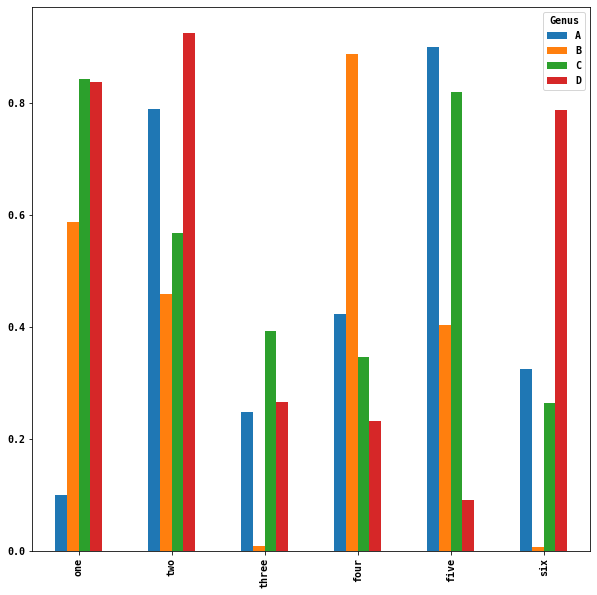

In [53]:
df.plot.bar()

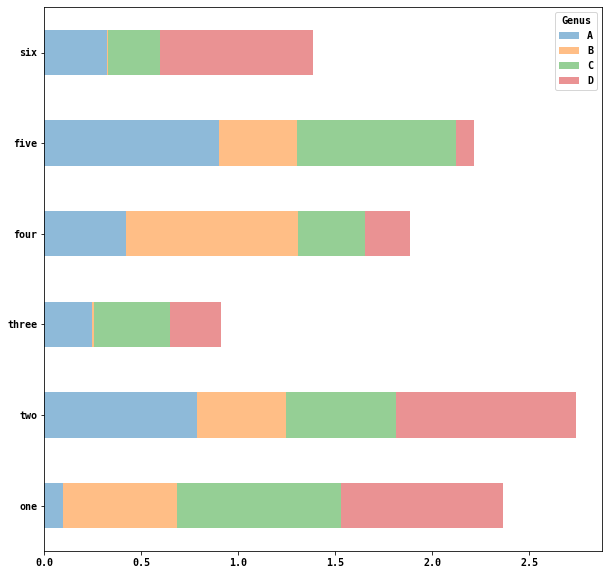

In [55]:
df.plot.barh(stacked=True, alpha=0.5)

#Histograms and Density Plots

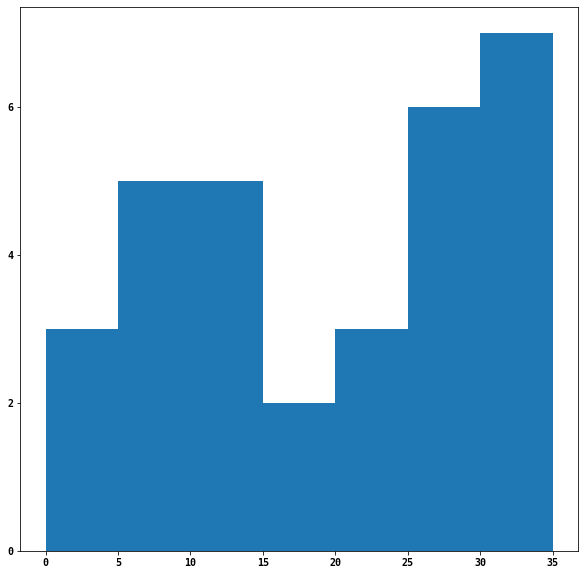

In [60]:
sold = [2,2,3, 5,6,7,8,9,10,10,10,10,10,15,15,20,20,20,25,25,25,25,25,25,30,30,30,30,30,30,30]
price_range = [0,5,10,15,20,25,30,35]
y_range =[0,2,4,6]
plt.yticks(y_range)
plt.hist(sold,bins=price_range)
plt.show()


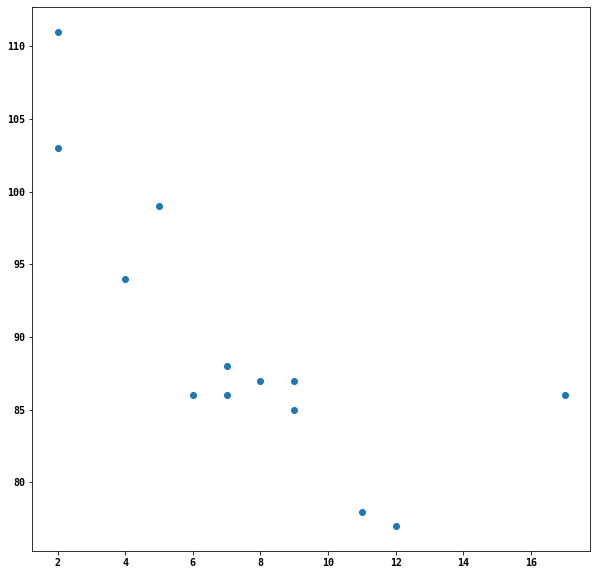

In [64]:
#Scatter or Point Plots
x = [5,7,8,7,2,17,2,9,4,11,12,9,6]
y = [99,86,87,88,111,86,103,87,94,78,77,85,86]

plt.scatter(x, y)
plt.show()

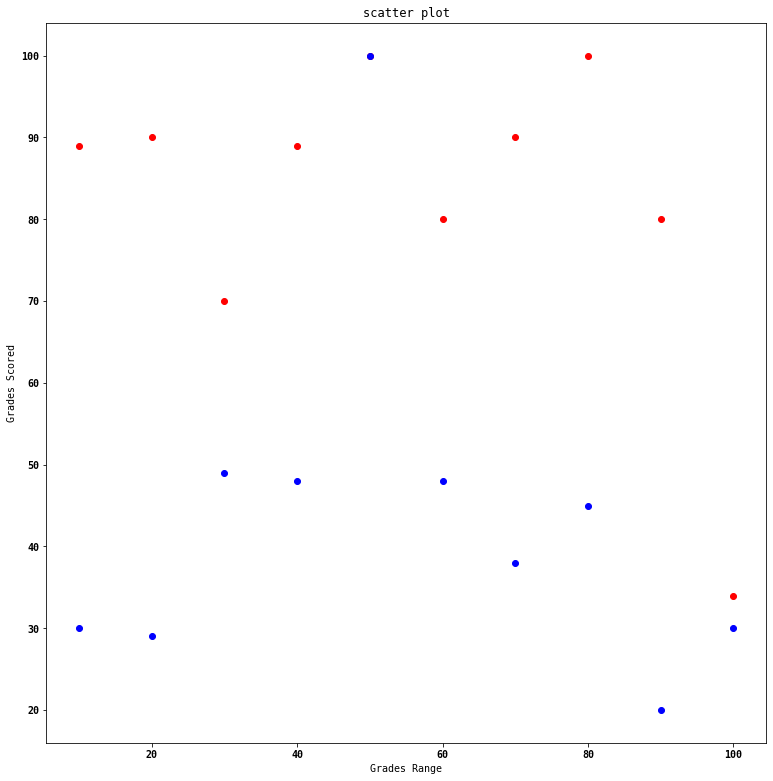

In [66]:
girls_grades = [89, 90, 70, 89, 100, 80, 90, 100, 80, 34]
boys_grades = [30, 29, 49, 48, 100, 48, 38, 45, 20, 30]
grades_range = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
fig=plt.figure()
ax=fig.add_axes([0,0,1,1])
ax.scatter(grades_range, girls_grades, color='r')
ax.scatter(grades_range, boys_grades, color='b')
ax.set_xlabel('Grades Range')
ax.set_ylabel('Grades Scored')
ax.set_title('scatter plot')
plt.show()

#Box Plots

A Box Plot is also known as Whisker plot is created to display the summary of the set of data values having properties like minimum, first quartile, median, third quartile and maximum. In the box plot, a box is created from the first quartile to the third quartile, a verticle line is also there which goes through the box at the median. Here x-axis denotes the data to be plotted while the y-axis shows the frequency distribution.

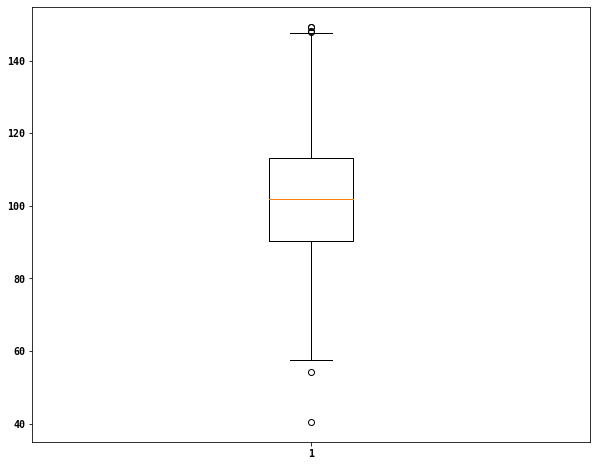

In [72]:
np.random.seed(10)
data= np.random.normal(100,20,200)
fig=plt.figure(figsize=(10,8))
plt.boxplot(data)
plt.show()

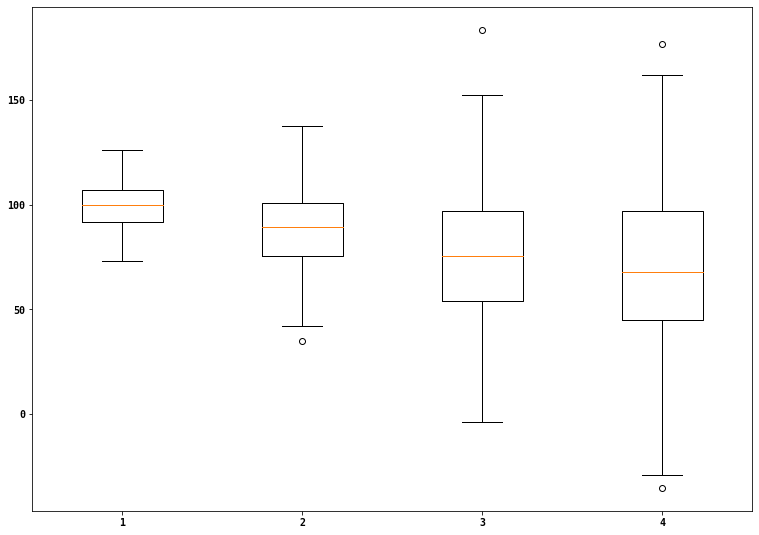

In [77]:
data_1 = np.random.normal(100, 10, 200) 
data_2 = np.random.normal(90, 20, 200) 
data_3 = np.random.normal(80, 30, 200) 
data_4 = np.random.normal(70, 40, 200) 
data = [data_1, data_2, data_3, data_4] 
fig = plt.figure(figsize =(10, 7)) 
ax = fig.add_axes([0, 0, 1, 1]) 
bp = plt.boxplot(data)
plt.show()

#Miscellaneous

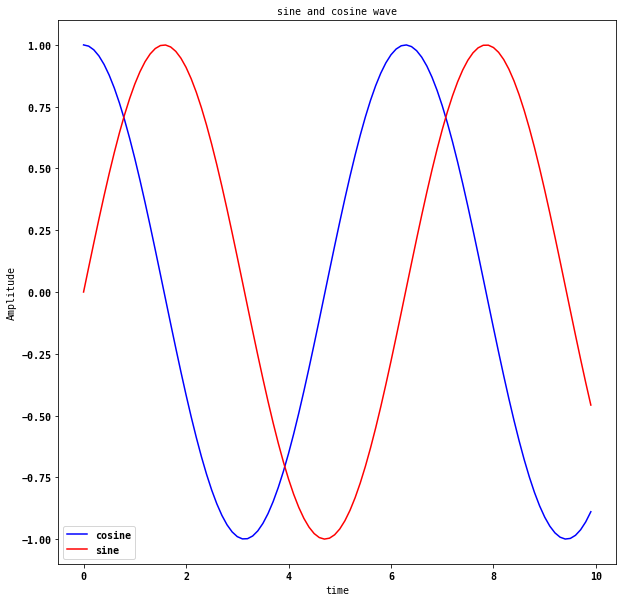

In [84]:
time= np.arange(0, 10, 0.1)
sine=np.sin(time)
cosine = np.cos(time)
plt.title('sine and cosine wave', fontsize=10)
plt.xlabel('time', fontsize=10)
plt.ylabel('Amplitude', fontsize=10)
plt.plot(time, cosine, color='blue', label='cosine')
plt.plot(time, sine, color='red', label='sine')
plt.legend(loc='lower left')